In [1]:
library('ggplot2')
library('reshape2')

In [2]:
sig2 = 1
mus = c(1,5,20)
N = 100

In [3]:
Ns = rep(N,3)
Ns

[1] 100 100 100

In [4]:
g1 <- data.frame(group=1,x = rnorm(Ns[1],mus[1],1))
g2 <- data.frame(group=2,x = rnorm(Ns[2],mus[2],1))
g3 <- data.frame(group=3,x = rnorm(Ns[3],mus[3],1))
d = rbind(g1,g2,g3)
d$group <- as.factor(d$group)
d = d[sample(nrow(d)),]

In [5]:
head(d)

,group,x
,<fct>,<dbl>
19,1,1.5355660
247,3,20.4780479
154,2,6.1421668
152,2,5.0381709
231,3,22.3098408
75,1,-0.7192248


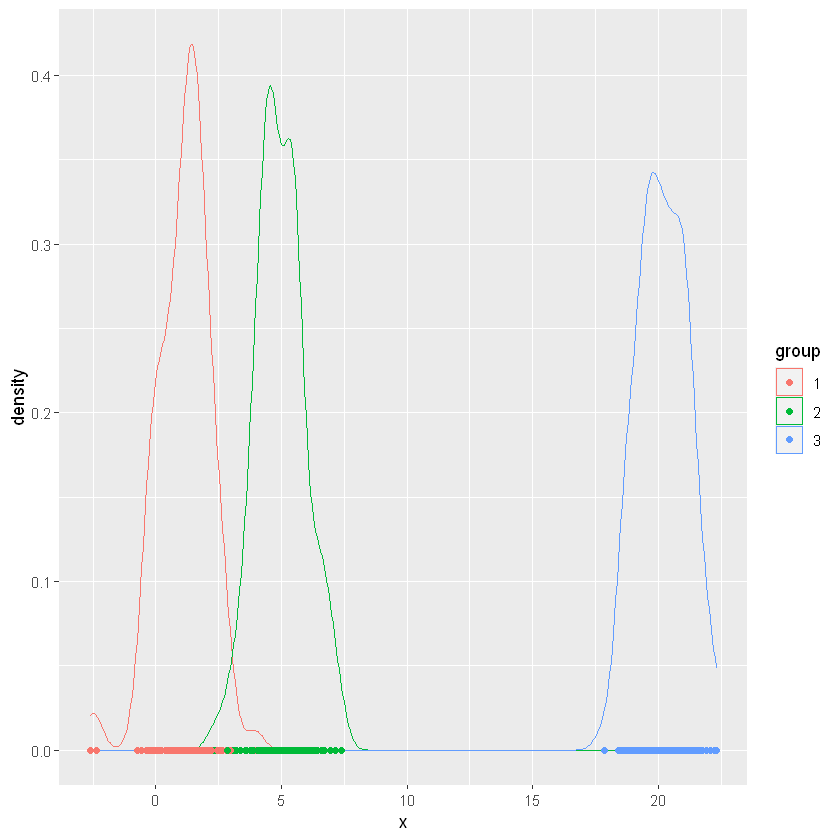

In [6]:
ggplot(data=d,mapping=aes(x=x,color=group,group=group))+
    geom_density()+
    geom_point(mapping=aes(x=x,y=0))

In [7]:
class=1
  
subd = d[d$group==class,]
head(subd)

,group,x
,<fct>,<dbl>
19,1,1.5355660
75,1,-0.7192248
22,1,2.5601505
78,1,-0.1390705
14,1,1.3356700
1,1,-0.1271385


In [8]:
# mu1_hat
muhat = mean(subd$x)
muhat

[1] 1.120678

In [9]:
# pi_hat
pi_hat = mean(d$group==class)
pi_hat

[1] 0.3333333

In [10]:
# pooled sd
vars = sapply(1:3,function(i)var(d[d$group==i,'x']))
vars

[1] 1.0908229 0.9731402 0.9517804

In [11]:
pooled_var = sum((Ns-1)*vars)/(sum(Ns)-3)
pooled_var

[1] 1.005248

In [12]:
var(d$x)

[1] 68.78398

In [13]:
x0 = 1

In [14]:
dnorm(x0,mean=muhat,sd=sqrt(pooled_var))*pi_hat

[1] 0.1316759

In [15]:
delta_lda_c = function(x0,class){
    subd = d[d$group==class,]
    muhat = mean(subd$x)
    pi_hat = mean(d$group==class)
    vars = sapply(1:3,function(i)var(d[d$group==i,'x']))
    pooled_var = sum((Ns-1)*vars)/(sum(Ns)-3)
    dlta = dnorm(x0,mean=muhat,sd=sqrt(pooled_var))*pi_hat
    return(dlta)
}

In [16]:
lda_pred = function(x0){
    deltas = sapply(1:3,function(c)delta_lda_c(x0,c))
    return(which.max(deltas))
}

In [17]:
lda_pred(x0=1)

[1] 1

In [18]:
lda_pred(x0=7)

[1] 2

In [19]:
lda_pred(x0=20)

[1] 3

In [20]:
x_seq = seq(-2,25,length.out=500)

In [21]:
df = data.frame(x=x_seq,y_pred = sapply(x_seq,lda_pred))
df$y_pred = factor(df$y_pred)
df$c1 = sapply(x_seq,delta_lda_c,class=1)
df$c2 = sapply(x_seq,delta_lda_c,class=2)
df$c3 = sapply(x_seq,delta_lda_c,class=3)
head(df)

,x,y_pred,c1,c2,c3
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,-2.000000,1,0.001044660,4.192625e-12,1.099854e-107
2,-1.945892,1,0.001233935,6.093021e-12,3.620184e-107
3,-1.891784,1,0.001453264,8.829061e-12,1.188123e-106
4,-1.837675,1,0.001706601,1.275650e-11,3.888009e-106
5,-1.783567,1,0.001998273,1.837738e-11,1.268611e-105
6,-1.729459,1,0.002332989,2.639799e-11,4.127286e-105


In [22]:
mdf = melt(df,id.vars=c('x','y_pred'))
head(mdf)

,x,y_pred,variable,value
,<dbl>,<fct>,<fct>,<dbl>
1,-2.000000,1,c1,0.001044660
2,-1.945892,1,c1,0.001233935
3,-1.891784,1,c1,0.001453264
4,-1.837675,1,c1,0.001706601
5,-1.783567,1,c1,0.001998273
6,-1.729459,1,c1,0.002332989


In [23]:
levels(mdf$variable) = c(1,2,3)

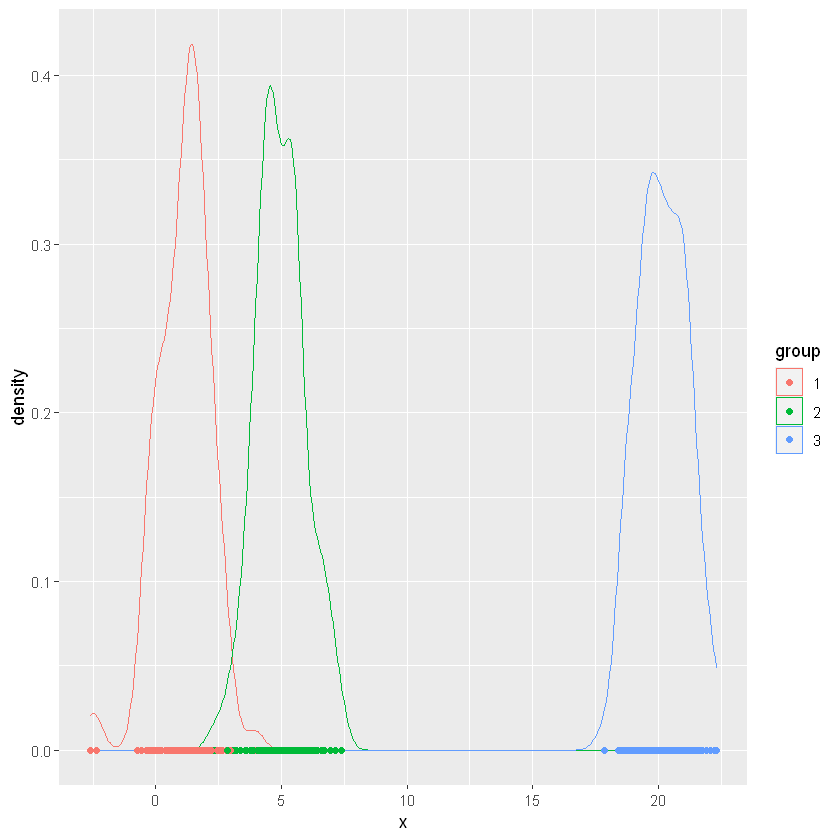

In [24]:
ggplot(data=d,mapping=aes(x=x,color=group,group=group))+
    geom_density()+
    geom_point(mapping=aes(x=x,y=0))

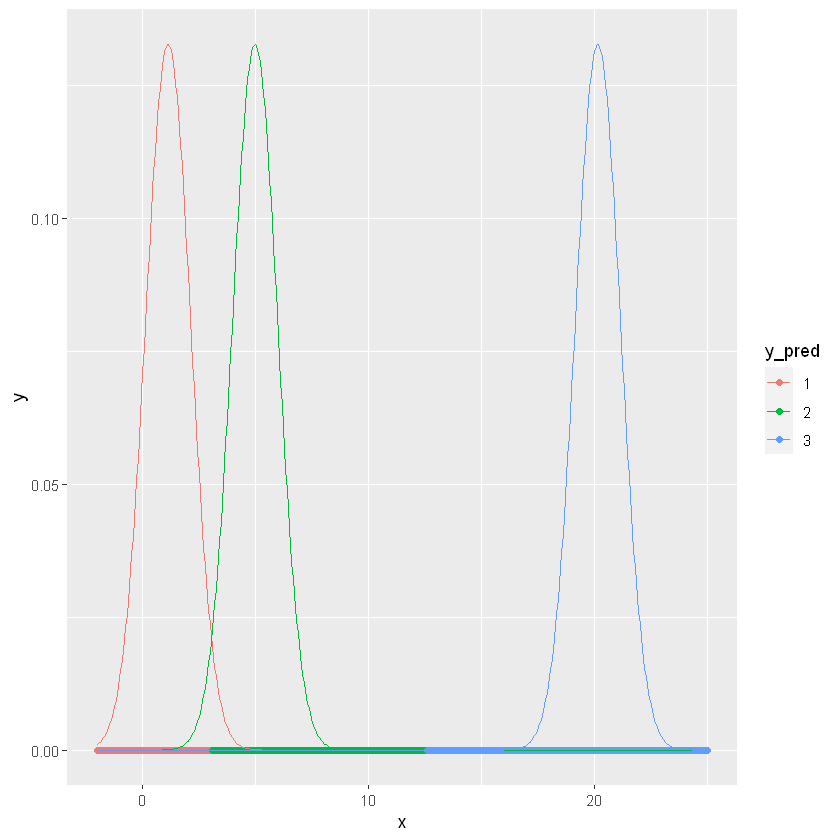

In [25]:
ggplot(data=mdf,mapping=aes(x=x,y=0,color=y_pred,group=y_pred))+
    geom_point()+
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),inherit.aes=FALSE)

In [26]:
library('MASS')
?lda

lda {MASS},R Documentation
formula,"A formula of the form groups ~ x1 + x2 + ... That is, the response is the grouping factor and the right hand side specifies the (non-factor) discriminators."
data,"An optional data frame, list or environment from which variables specified in formula are preferentially to be taken."
x,(required if no formula is given as the principal argument.) a matrix or data frame or Matrix containing the explanatory variables.
grouping,(required if no formula principal argument is given.) a factor specifying the class for each observation.
prior,"the prior probabilities of class membership. If unspecified, the class proportions for the training set are used. If present, the probabilities should be specified in the order of the factor levels."
tol,A tolerance to decide if a matrix is singular; it will reject variables and linear combinations of unit-variance variables whose variance is less than tol^2.
subset,"An index vector specifying the cases to be used in the training sample. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. The default action is for the procedure to fail. An alternative is na.omit, which leads to rejection of cases with missing values on any required variable. (NOTE: If given, this argument must be named.)"
method,"""moment"" for standard estimators of the mean and variance, ""mle"" for MLEs, ""mve"" to use cov.mve, or ""t"" for robust estimates based on a t distribution."
CV,"If true, returns results (classes and posterior probabilities) for leave-one-out cross-validation. Note that if the prior is estimated, the proportions in the whole dataset are used."


In [27]:
my_preds = sapply(d$x,lda_pred)
my_preds

[1] 1 3 2 2 3 1 3 1 1 1 1 1 3 3 2 2 2 1 3 2 2 1 1 1 2 3 1 2 1 3 2 2 1 3 3 2 3
 [38] 3 2 3 3 2 3 3 3 1 1 3 1 1 1 1 2 3 1 1 3 3 1 1 1 1 3 1 3 3 3 2 3 2 1 2 1 1
 [75] 3 3 1 3 2 1 2 1 3 2 2 3 3 1 2 2 1 1 3 2 3 1 3 3 3 1 1 2 2 2 1 3 1 2 3 2 3
[112] 1 3 1 3 1 2 1 2 3 2 2 2 1 2 3 2 2 1 1 2 2 2 1 3 2 1 3 1 3 2 1 3 1 2 2 2 2
[149] 2 2 3 3 1 3 1 2 1 2 2 1 1 1 2 1 1 3 2 3 2 1 1 3 1 3 1 3 2 1 3 3 2 2 3 2 3
[186] 1 1 2 2 2 3 2 1 2 1 3 2 3 3 1 3 3 2 1 2 3 1 3 2 1 1 2 2 2 3 2 2 2 2 2 1 1
[223] 3 2 1 3 1 3 2 2 2 1 2 2 1 1 2 3 1 3 3 2 3 2 1 3 3 3 3 3 1 2 1 2 2 2 2 3 3
[260] 1 3 3 1 2 1 2 1 1 1 3 2 1 2 3 2 3 1 3 3 3 1 1 3 2 1 3 3 3 1 3 3 1 3 3 2 3
[297] 2 1 2 1

In [28]:
mod = lda(group~.,data=d)

In [29]:
mod

Call:
lda(group ~ ., data = d)

Prior probabilities of groups:
        1         2         3 
0.3333333 0.3333333 0.3333333 

Group means:
          x
1  1.120678
2  4.972002
3 20.160465

Coefficients of linear discriminants:
        LD1
x 0.9973864

In [30]:
muhat

[1] 1.120678

In [31]:
pi_hat

[1] 0.3333333

In [32]:
mod_preds = predict(mod)$class
mod_preds

[1] 1 3 2 2 3 1 3 1 1 1 1 1 3 3 2 2 2 1 3 2 2 1 1 1 2 3 1 2 1 3 2 2 1 3 3 2 3
 [38] 3 2 3 3 2 3 3 3 1 1 3 1 1 1 1 2 3 1 1 3 3 1 1 1 1 3 1 3 3 3 2 3 2 1 2 1 1
 [75] 3 3 1 3 2 1 2 1 3 2 2 3 3 1 2 2 1 1 3 2 3 1 3 3 3 1 1 2 2 2 1 3 1 2 3 2 3
[112] 1 3 1 3 1 2 1 2 3 2 2 2 1 2 3 2 2 1 1 2 2 2 1 3 2 1 3 1 3 2 1 3 1 2 2 2 2
[149] 2 2 3 3 1 3 1 2 1 2 2 1 1 1 2 1 1 3 2 3 2 1 1 3 1 3 1 3 2 1 3 3 2 2 3 2 3
[186] 1 1 2 2 2 3 2 1 2 1 3 2 3 3 1 3 3 2 1 2 3 1 3 2 1 1 2 2 2 3 2 2 2 2 2 1 1
[223] 3 2 1 3 1 3 2 2 2 1 2 2 1 1 2 3 1 3 3 2 3 2 1 3 3 3 3 3 1 2 1 2 2 2 2 3 3
[260] 1 3 3 1 2 1 2 1 1 1 3 2 1 2 3 2 3 1 3 3 3 1 1 3 2 1 3 3 3 1 3 3 1 3 3 2 3
[297] 2 1 2 1
Levels: 1 2 3

In [33]:
all(mod_preds == my_preds)

[1] TRUE

In [34]:
head(predict(mod)$posterior)

,1,2,3
19,9.969456e-01,3.054424e-03,1.269294e-75
247,1.201709e-81,1.213434e-52,1.000000e+00
154,7.061910e-06,9.999929e-01,7.020409e-43
152,4.848730e-04,9.995151e-01,3.998720e-50
231,1.028033e-96,1.159049e-64,1.000000e+00
75,9.999995e-01,5.427042e-07,3.611115e-94


In [35]:
mod_df = cbind(x_seq,predict(mod,newdata=data.frame(x=x_seq))$posterior)
colnames(mod_df)[1] = c('x')
mod_df = data.frame(mod_df)
mmod_df = melt(mod_df,id.vars='x')
levels(mmod_df$variable) = 1:3
head(mmod_df)

,x,variable,value
,<dbl>,<fct>,<dbl>
1,-2.000000,1,1
2,-1.945892,1,1
3,-1.891784,1,1
4,-1.837675,1,1
5,-1.783567,1,1
6,-1.729459,1,1


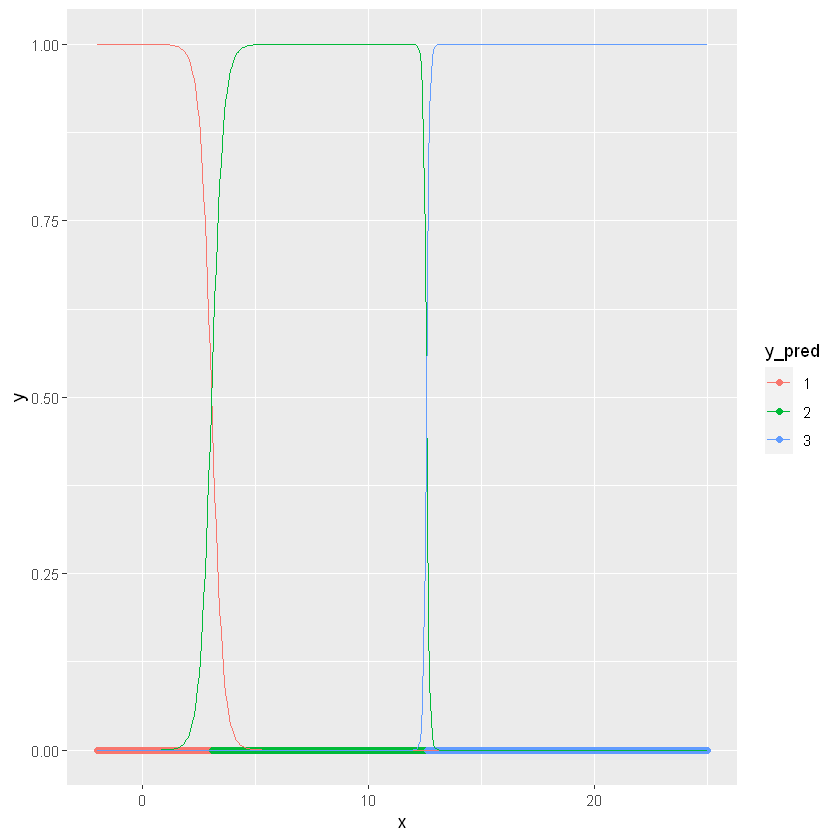

In [36]:
ggplot(data=mdf,mapping=aes(x=x,y=0,color=y_pred,group=y_pred))+
    geom_point()+
    #geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),inherit.aes=FALSE)+
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),inherit.aes=FALSE,data=mmod_df)

In [37]:
head(df)

,x,y_pred,c1,c2,c3
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,-2.000000,1,0.001044660,4.192625e-12,1.099854e-107
2,-1.945892,1,0.001233935,6.093021e-12,3.620184e-107
3,-1.891784,1,0.001453264,8.829061e-12,1.188123e-106
4,-1.837675,1,0.001706601,1.275650e-11,3.888009e-106
5,-1.783567,1,0.001998273,1.837738e-11,1.268611e-105
6,-1.729459,1,0.002332989,2.639799e-11,4.127286e-105


In [38]:
df[,3:5] = df[,3:5]/rowSums(df[,3:5])

In [39]:
mdf = melt(df,id.vars=c('x','y_pred'))

In [40]:
levels(mdf$variable) = c(1,2,3)

mapping: x = ~x, y = ~value, group = ~variable, colour = ~variable 
geom_line: na.rm = FALSE, orientation = NA
stat_identity: na.rm = FALSE
position_identity 

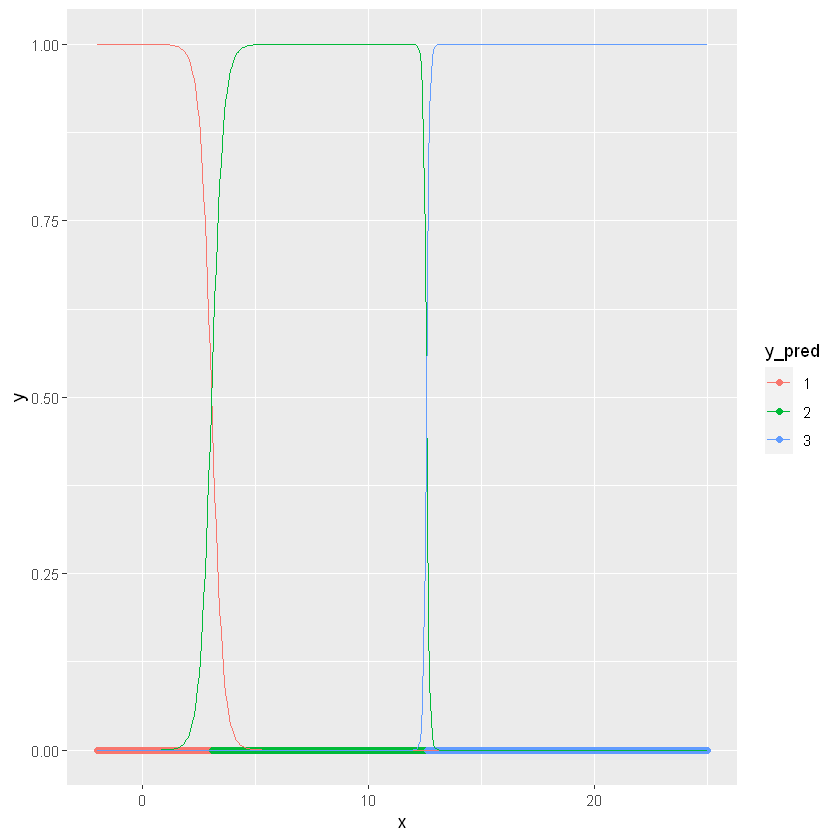

In [41]:
ggplot(data=mdf,mapping=aes(x=x,y=0,color=y_pred,group=y_pred))+
    geom_point()+
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),inherit.aes=FALSE)
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),inherit.aes=FALSE,data=mmod_df)

In [42]:
delta_lda_c2 = function(x0,class){
    subd = d[d$group==class,]
    muhat = mean(subd$x)
    pi_hat = mean(d$group==class)
    vars = sapply(1:3,function(i)var(d[d$group==i,'x']))
    pooled_var = sum((Ns-1)*vars)/(sum(Ns)-3)
    dlta = muhat*x0/(pooled_var) - muhat^2/(2*pooled_var)+log(pi_hat)
    return(dlta)
}
lda_pred2 = function(x0){
    deltas = sapply(1:3,function(c)delta_lda_c(x0,c))
    return(which.max(deltas))
}

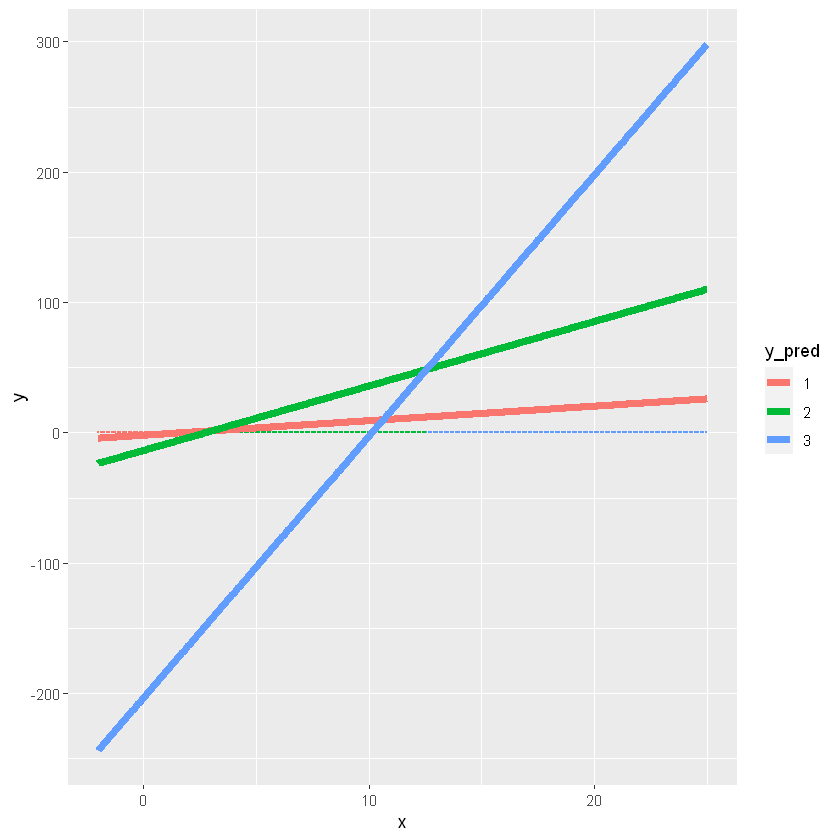

In [43]:
df = data.frame(x=x_seq,y_pred = sapply(x_seq,lda_pred2))
df$y_pred = factor(df$y_pred)
df$c1 = sapply(x_seq,delta_lda_c2,class=1)
df$c2 = sapply(x_seq,delta_lda_c2,class=2)
df$c3 = sapply(x_seq,delta_lda_c2,class=3)

mdf = melt(df,id.vars=c('x','y_pred'))
levels(mdf$variable) = c(1,2,3)

ggplot(data=mdf,mapping=aes(x=x,y=0,color=y_pred,group=y_pred))+
    geom_point(shape=1,size=1/10)+
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),lwd=2)

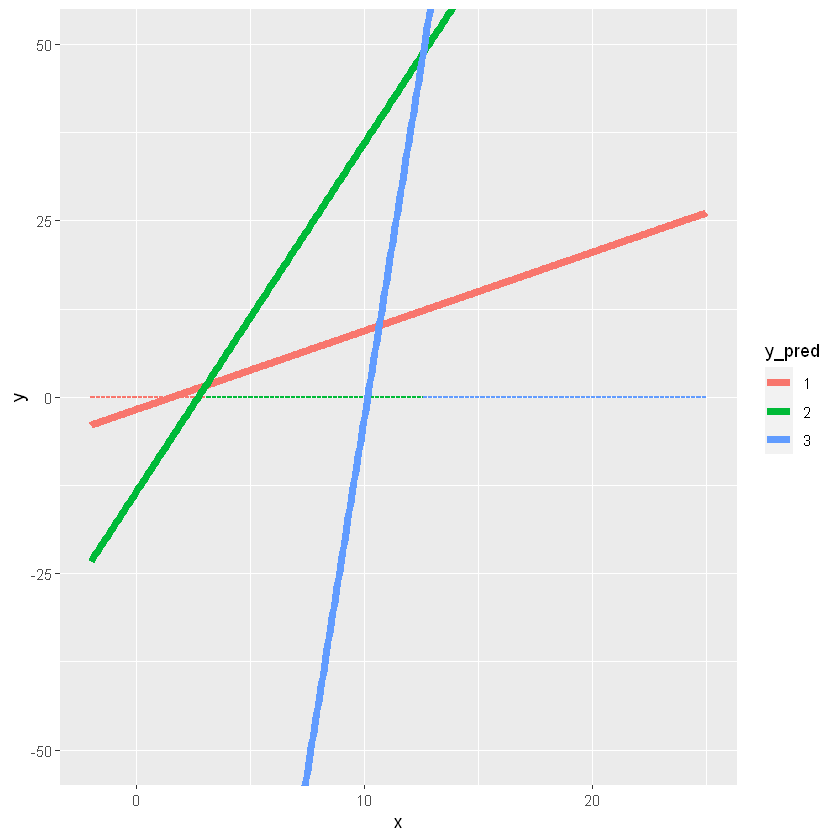

In [44]:
ggplot(data=mdf,mapping=aes(x=x,y=0,color=y_pred,group=y_pred))+
    geom_point(shape=1,size=1/10)+
    geom_line(mapping=aes(x=x,y=value,group=variable,color=variable),lwd=2)+
    coord_cartesian(ylim=c(-50,50))

# for $p>1$

In [45]:
library('palmerpenguins')
penguins = penguins[complete.cases(penguins),]
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007


In [46]:
d = penguins[,c('bill_length_mm','bill_depth_mm','species')]
head(d)

bill_length_mm,bill_depth_mm,species
<dbl>,<dbl>,<fct>
39.1,18.7,Adelie
39.5,17.4,Adelie
40.3,18.0,Adelie
36.7,19.3,Adelie
39.3,20.6,Adelie
38.9,17.8,Adelie


In [47]:
mod = lda(species~.,data=d)
mod

Call:
lda(species ~ ., data = d)

Prior probabilities of groups:
   Adelie Chinstrap    Gentoo 
0.4384384 0.2042042 0.3573574 

Group means:
          bill_length_mm bill_depth_mm
Adelie          38.82397      18.34726
Chinstrap       48.83382      18.42059
Gentoo          47.56807      14.99664

Coefficients of linear discriminants:
                      LD1        LD2
bill_length_mm  0.3522643 -0.1828302
bill_depth_mm  -0.9036821 -0.5336367

Proportion of trace:
   LD1    LD2 
0.9221 0.0779 

In [48]:
plot_fit = function(v1,v2,df=penguins,N=floor(sqrt(10000)),scaleit=FALSE,fmla='species~.'){
    train_df = df[,c('species',v1,v2)]
    if(scaleit)
        train_df[,c(v1,v2)] = scale(train_df[,c(v1,v2)])
    
    #mod = knn3(species~.,data=train_df,k=k)
    mod = lda(formula=as.formula(fmla),data=train_df)
    
    r1 = range(train_df[[v1]])
    r2 = range(train_df[[v2]])
    
    s1 = seq(r1[1],r1[2],length.out=N)
    s2 = seq(r2[1],r2[2],length.out=N)
    
    p_df = expand.grid(v1=s1,v2=s2)
    colnames(p_df) = c(v1,v2)
    preds = predict(mod,newdata=p_df)$class
    p_df$species = preds
    
    ggplot(data=p_df,mapping=aes_string(x=v1,y=v2,fill='species',shape='species'))+geom_tile()+
        geom_point(data=train_df,size=5)
}

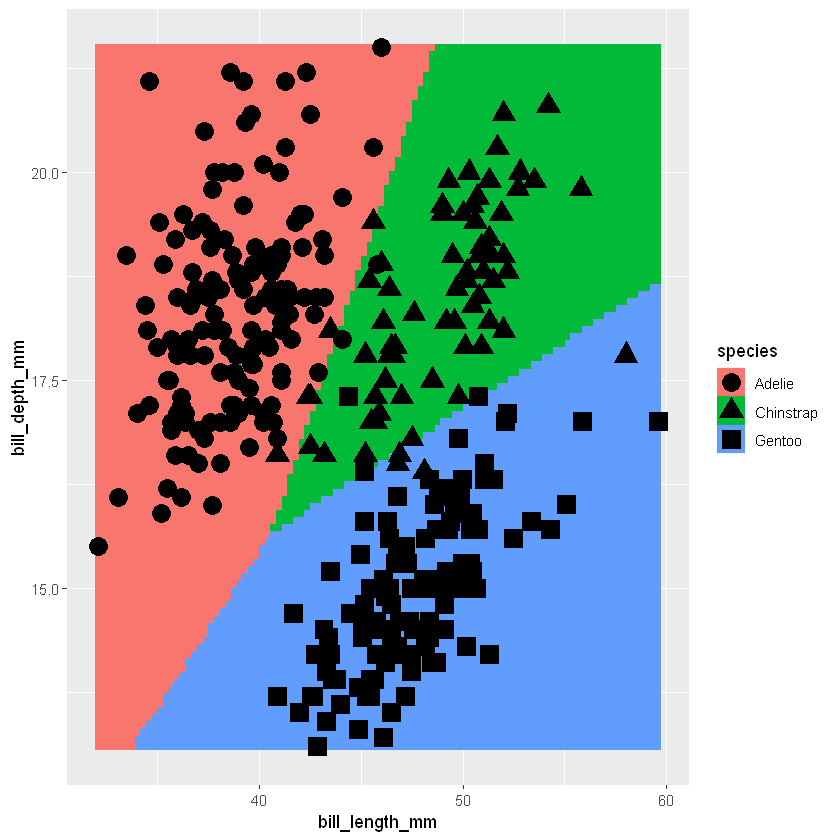

In [49]:
plot_fit(v1='bill_length_mm',v2='bill_depth_mm',df=penguins)

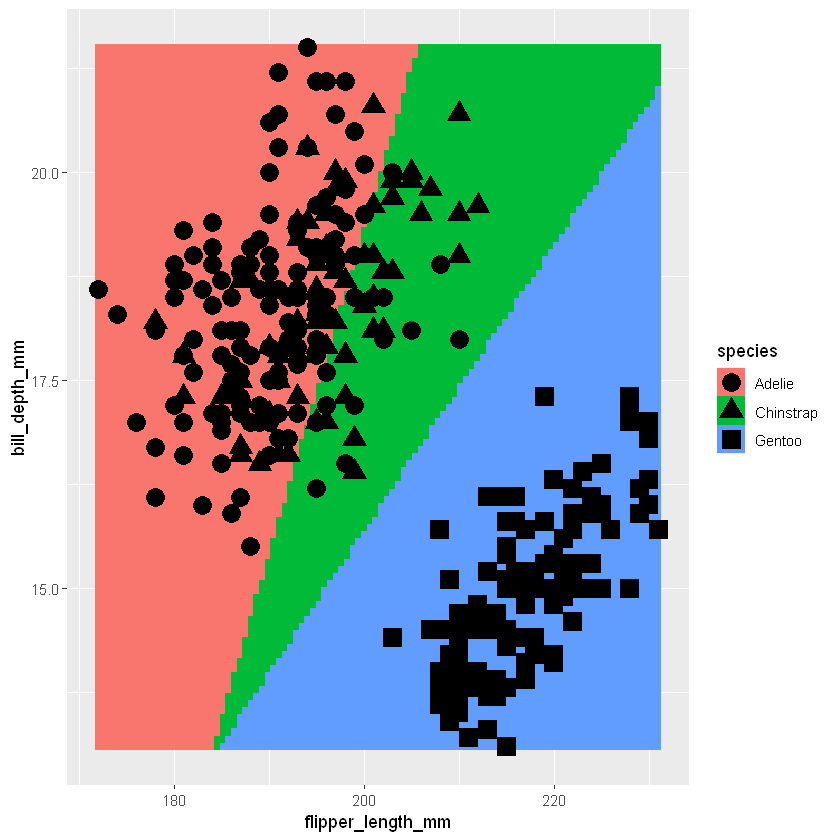

In [50]:
plot_fit(v1='flipper_length_mm',v2='bill_depth_mm',df=penguins)

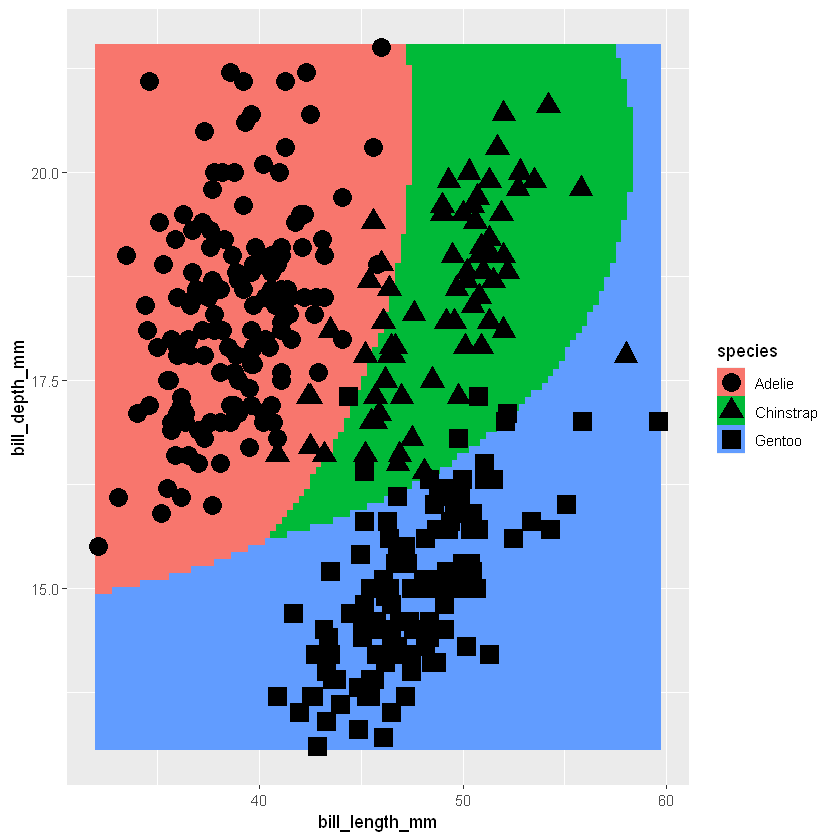

In [51]:
plot_fit(v1='bill_length_mm',v2='bill_depth_mm',df=penguins,
             fmla='species~I(bill_length_mm^5)+I(bill_depth_mm^3)+I(bill_depth_mm^2)')